# ボストン住宅価格 線形回帰

# Summary
### Tuning
- Dimension
```
degree_2=PolynomialFeatures(degree=2)
degree_3=PolynomialFeatures(degree=3)
```

### Evaluation
- MSE
```
x_test = X_test.loc[:, ['LSTAT']].as_matrix()
mean_squared_error(y_test, lin_1d.predict(x_test))
```
- R^2
```
print(lin_1d.score(x_test, y_test))
```

# 線形回帰とは何か
以下の観点をすべて含めて記述しましょう。

1. 線形回帰とは何か。
2. 具体的に言うと？
3. 分類と何か違うのか。

__回答：__

1. 線形回帰とは、あるデータの集合から得た複数のプロット（変数）の関係を定式化すること。y=ax+b （xが独立変数、yが従属変数）など、最適な偏回帰係数（aやb）を求める。
2. 削除→~~最小二乗法~~

- - - - - 
（追記 2017/10/16）
- どのような回帰のさせ方があるか。
    - 単回帰（特徴量を一つだけ用いた回帰）
    - 重回帰（特徴量を複数用いた回帰）
    - ロジスティック回帰（確率予測や、2クラスに分類することに向いている回帰）

- 具体的にどのような流れや知識をもってデータから予測が行われるのか

教師ありのケースにおいて、あるデータの集合の説明変数と被説明変数を使い、選んだ回帰モデルのパラメータ（偏回帰係数）を求める。線形回帰モデルでは最小二乗法を用いて推定する。

求めたパラメータや説明変数を増やしたり、高次方程式にすることで、学習モデルを目的のモデルに近づける。指標は平均二乗誤差（MSE）や決定係数を使う。

    - MSE：誤差の二乗和の平均値で、学習用データ、検証用データともに小さければモデルの性能が良い
    - 決定係数：モデルの性能が良いほど1に近い量になりる（MSEが0の場合に1をとる）。

最終的に、上記の指標などを使って条件を満たした学習モデルを選定し、未知のデータから予測を行う。
- - - - - 
 
3. 分類は与えられるカテゴリに分けること。回帰はデータの予測を行うこと。


# データを取得する

__回答：__

In [16]:
from sklearn.datasets import load_boston
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import PolynomialFeatures
%matplotlib inline

boston = load_boston()

# 取得データをDataFrameにする

In [17]:
X=pd.DataFrame(boston.data[:,:], columns=boston.feature_names)
y=pd.DataFrame(boston.target[:])

##### チェック
* * * 

In [18]:
X.head(3)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03


In [19]:
X['LSTAT'].isnull().any()

False

In [20]:
y.head(3)

,0
0,24.0
1,21.6
2,34.7


* * * 

# 説明変数を’LSTAT’のみにする

In [21]:
x = X['LSTAT'].values
#plt.scatter(X['LSTAT'],y) #同じ

# 単回帰と重回帰についての違いを記述せよ

__回答：__
- 単回帰はxとしてひとつの特徴量のみを扱う回帰。
    - 例）身長と体重の関係。x:身長,y:体重
- 重回帰は複数のxとして、複数の特徴量を扱う回帰。
    - 例）新幹線の利用者。x1:GDP成長率、x2：高速道路の通行料、x3：航空運賃,y:新幹線の利用者数

# テストデータに分割する

In [22]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=0)

### ※データの形状を確認する
* * *

In [23]:
X_test.shape

(102, 13)

In [24]:
X_train.shape

(404, 13)

In [25]:
y_test.shape

(102, 1)

In [26]:
y_test.head(3) # Seriesは行列？

,0
329,22.6
371,50.0
219,23.0


In [27]:
#plt.scatter(X_train['LSTAT'],y_train)
# 母集団の似た散布図

* * *

# 学習

In [28]:
print("{}, ndim {}, shape {}".format(type(X_train),X_train.ndim,X_train.shape))

<class 'pandas.core.frame.DataFrame'>, ndim 2, shape (404, 13)


In [33]:
lin_1d = LinearRegression()
x_train = X_train.loc[:, ['LSTAT']].as_matrix()
lin_1d.fit(x_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [34]:
print("{}, ndim {}, shape {}".format(type(x_train),x_train.ndim,x_train.shape))

<class 'numpy.ndarray'>, ndim 2, shape (404, 1)


In [35]:
s = np.linspace(np.min(x_train),np.max(x_train), 1000)

In [38]:
s = s[:,np.newaxis]

In [40]:
s

array([[  1.73      ],
       [  1.76528529],
       [  1.80057057],
       [  1.83585586],
       [  1.87114114],
       [  1.90642643],
       [  1.94171171],
       [  1.976997  ],
       [  2.01228228],
       [  2.04756757],
       [  2.08285285],
       [  2.11813814],
       [  2.15342342],
       [  2.18870871],
       [  2.22399399],
       [  2.25927928],
       [  2.29456456],
       [  2.32984985],
       [  2.36513514],
       [  2.40042042],
       [  2.43570571],
       [  2.47099099],
       [  2.50627628],
       [  2.54156156],
       [  2.57684685],
       [  2.61213213],
       [  2.64741742],
       [  2.6827027 ],
       [  2.71798799],
       [  2.75327327],
       [  2.78855856],
       [  2.82384384],
       [  2.85912913],
       [  2.89441441],
       [  2.9296997 ],
       [  2.96498498],
       [  3.00027027],
       [  3.03555556],
       [  3.07084084],
       [  3.10612613],
       [  3.14141141],
       [  3.1766967 ],
       [  3.21198198],
       [  3

In [39]:
print("{}, ndim {}, shape {}".format(type(s),s.ndim,s.shape))

<class 'numpy.ndarray'>, ndim 2, shape (1000, 1)


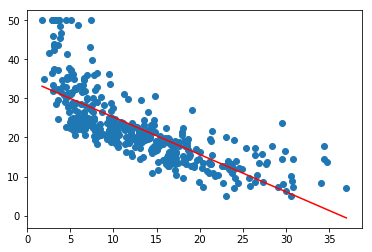

In [24]:
n = np.linspace(np.min(x_train),np.max(x_train), 1000)
y_1d_fit=lin_1d.predict(n[:,np.newaxis])

plt.scatter(x_train,y_train,label='data')
plt.plot(n,y_1d_fit,'r',label='1d_lin')

In [25]:
lin_1d.predict(35)

array([[ 1.28812629]])

##### ２乗和誤差

In [29]:
x_test = X_test.loc[:, ['LSTAT']].as_matrix()
mean_squared_error(y_test, lin_1d.predict(x_test))

46.336305360025925

# 決定係数

In [27]:
print(lin_1d.score(x_test, y_test))

0.430956728462


# 決定係数とは何か記述せよ


1. 決定係数とは何か
2. もっとも説明変数が、目的変数を説明できる場合、決定係数は何になるか
3. どのように求めることができるか

__回答：__
1. 推定した回帰式がどの程度の説明力を有するかを示す指標。当てはまり具合を表す。
2. もっとも説明変数が、目的変数を説明できる場合、決定係数は1になる。
3. 実際のデータと推定された回帰式から「全変動」「回帰変動」「残差変動」の3つを求め、以下の式に当てはめる。

「全変動」＝「回帰変動」＋「残差変動」
つまり「回帰変動が全変動に対してどれだけ多いか＝残差変動が全変動に対してどれだけ少ないか」を表す。
したがって決定係数は、下記のように回帰変動を全変動で割ることで求められます。

R^2 = 回帰変動 / 全変動 

これは下記の式と同じ。

R^2 = 1 - （残差変動 / 全変動）

なので決定係数は0から1の範囲内となる。
[参考](https://bellcurve.jp/statistics/course/9706.html)

# 決定係数をいかなる場合も信じても良いか記述せよ(決定係数が高ければ、汎用性があるモデルと言えるか)


信じるべきではない。

- 決定係数は標本から求めた回帰方程式の当てはまり具合。母集団を意識して自由度を加味した自由度調整済み決定係数のほうが正確。
- ただ次の理由で自由度調整済み決定係数も信じるべきではない。（引用）目的や仮説とは一切関係ない変数を、決定係数が上がるからという理由だけで無秩序に分析に加えてしまうと、そのモデルは解釈が難しくなり当初の目的を果たせない。外れ値を含む場合も同様に決定係数に影響を与える。
- 使い方には注意。決定係数はあくまで「予測の当てはまりの良さ」を表す指標。分析の目的が「ある変数の値を予測」であること。ある変数の影響の有無が主眼であり予測は重視しない場合には適さない。[参考](http://xica.net/magellan/marketing-idea/stats/about-coefficient-of-determination/)




# 2,3,4次式の回帰

##### prep

In [30]:
degree_2=PolynomialFeatures(degree=2)
degree_3=PolynomialFeatures(degree=3)
degree_4=PolynomialFeatures(degree=4)
x_train = X_train.loc[:, ['LSTAT']].as_matrix()
x_train_2=degree_2.fit_transform(x_train)
x_train_3=degree_3.fit_transform(x_train)
x_train_4=degree_4.fit_transform(x_train)

In [32]:
lin_2d = LinearRegression()
lin_3d = LinearRegression()
lin_4d = LinearRegression()

lin_2d.fit(x_train_2, y_train)
lin_3d.fit(x_train_3, y_train)
lin_4d.fit(x_train_4, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [33]:
x_test = X_test.loc[:, ['LSTAT']].as_matrix()

In [35]:
x_test_2 = degree_2.fit_transform(x_test)
x_test_3 = degree_3.fit_transform(x_test)
x_test_4 = degree_4.fit_transform(x_test)

##### 決定係数

In [36]:
print("degree 2: %f" % lin_2d.score(x_test_2, y_test))
print("degree 3: %f" % lin_3d.score(x_test_3, y_test))
print("degree 4: %f" % lin_4d.score(x_test_4, y_test))

degree 2: 0.522932
degree 3: 0.542859
degree 4: 0.573799


##### 誤差関数

In [37]:
print("degree 2: %f" % mean_squared_error(y_test,lin_2d.predict(x_test_2)))
print("degree 3: %f" % mean_squared_error(y_test,lin_3d.predict(x_test_3)))
print("degree 4: %f" % mean_squared_error(y_test,lin_4d.predict(x_test_4)))


degree 2: 38.846869
degree 3: 37.224242
degree 4: 34.704869


* * * * *

# 次数が大きくなるとどうなるか記述せよ
- 説明変数をxとして、次数を増やしていくとどのように数式が変化していくか記述せよ（1次式 ax + b）
- 次数を増やすとどのようなメリットが考えられるか
- 次数を増やすとどのようなデメリットが考えられるか

__回答：__
- ax^2+bx+c
- 表現力が高くなる
- 過学習しやすくなる。

* * * *
# 重回帰

#### 単回帰

In [49]:
# LSTAT
x_test = X_test['LSTAT'].values[:,np.newaxis]
score_1d = lin_1d.score(x_test, y_test)
print("一次式における'LSTAT'の住宅価格への決定係数は%f" % (score_1d))

一次式における'LSTAT'の住宅価格への決定係数は0.430957


#### 重回帰

In [38]:
from itertools import chain, combinations
dim=[3,4]
i = set(list(X.columns))

for di in dim:

    degree_=PolynomialFeatures(degree=di)

    for p in chain.from_iterable(combinations(i, r) for r in range(len(i)+1)):
        if len(p) == 0:
            continue
        else:
            x_train = X_train.loc[:, p].as_matrix()
            x_train_d = degree_.fit_transform(x_train)

            lin_ = LinearRegression(normalize=True)
            #normalize=Trueは入力データを正規化してトレーニングすることを意味します。    
            lin_.fit(x_train_d,y_train)

            x_test = X_test.loc[:, p].as_matrix()
            x_test_d = degree_.fit_transform(x_test)

            score_d = lin_.score(x_test_d, y_test)

            if score_d >= 0.75:
                print('d:{0} s:{1} p:{2}'.format(di,score_d, p))

d:3 s:0.7535202032485468 p:('RAD', 'RM', 'LSTAT', 'NOX', 'CHAS')
d:3 s:0.7685431811199771 p:('RAD', 'RM', 'LSTAT', 'TAX', 'B', 'DIS')
d:3 s:0.7645902503357569 p:('RAD', 'RM', 'ZN', 'LSTAT', 'TAX', 'B', 'DIS')
d:3 s:0.7670668028826491 p:('RM', 'PTRATIO', 'LSTAT', 'TAX', 'B', 'INDUS', 'DIS')


# 重回帰について記述せよ

- 重回帰は複数のxとして、複数の特徴量を扱う回帰。
    - 例）新幹線の利用者。x1:GDP成長率、x2：高速道路の通行料、x3：航空運賃,y:新幹線の利用者数

- 説明変数を増やすことでどのようなメリットがあるか
- 説明変数を増やすことでどのようなデメリットがあるか

__回答：__
- (メリット)誤差が小さくできる。予測の精度が上げることができる
- (デメリット)[モデルの説明変数は必要以上に増やせば増やすほど学習データのシグナルだけでなくノイズにまでフィットしてしまう](http://tjo.hatenablog.com/entry/2016/04/14/190000)
- (デメリット)独立変数X1,X2,....Xnの間に強い相関が認められるものが含まれる場合、重回帰モデルの信頼性を損ねる可能性あり（多重共通性の存在）。
